# **CROP RECOMMENDATION SYSTEM**




# **STEP -1  :  Import libraries**

***Here we are using many libraries for various purposes, they are listed below:***

Data Handling  -  pandas, numpy

Visualization  - matplotlib, seaborn

Machine Learning  - train_test_split, RandomForestClassifier, StandardScaler

Model Evaluation  - accuracy_score, confusion_matrix, classification_report

warnings   - to hide un-necessary warnings while running


In [16]:
# Data analysis & manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# **Step 2  : Upload The Dataset**

In [4]:
data = pd.read_csv("Crop_recommendation.csv")
print("The dataset is uploaded successsfully")
print()
print("🔹 First 5 Rows of Data:")
display(data.head())
print()
print("\n🔹 Dataset Info:")
data.info()
print()
print("\n🔹 Null Values Count:")
print(data.isnull().sum())


The dataset is uploaded successsfully

🔹 First 5 Rows of Data:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice




🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


🔹 Null Values Count:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# **Step 3  : Data Cleaning**

Data Cleaning / Data Preprocessing refers to the process of fixing or removing incorrect, incomplete, or irrelevant data
from a dataset before performing analysis or building a machine learning model.

**a) Checking for duplicates**


In [5]:
duplicates = data.duplicated().sum()
print(f"🔹 Number of duplicate rows: {duplicates}")

if duplicates > 0:
    data = data.drop_duplicates()
    print("✅ Duplicates removed successfully!")
else:
    print("✅ No duplicates found.")


🔹 Number of duplicate rows: 0
✅ No duplicates found.


**b) Handle Missing Values**  (incomplete data)

In [6]:
if data.isnull().sum().any():
    print("⚠️ Missing values found. Filling with column means...")
    data = data.fillna(data.mean())
    print("✅ Missing values filled using mean imputation.")
else:
    print("✅ No missing values found in this dataset.")


✅ No missing values found in this dataset.


**c) Check for Outliers** (We’ll visualize and (optionally) handle outliers.)

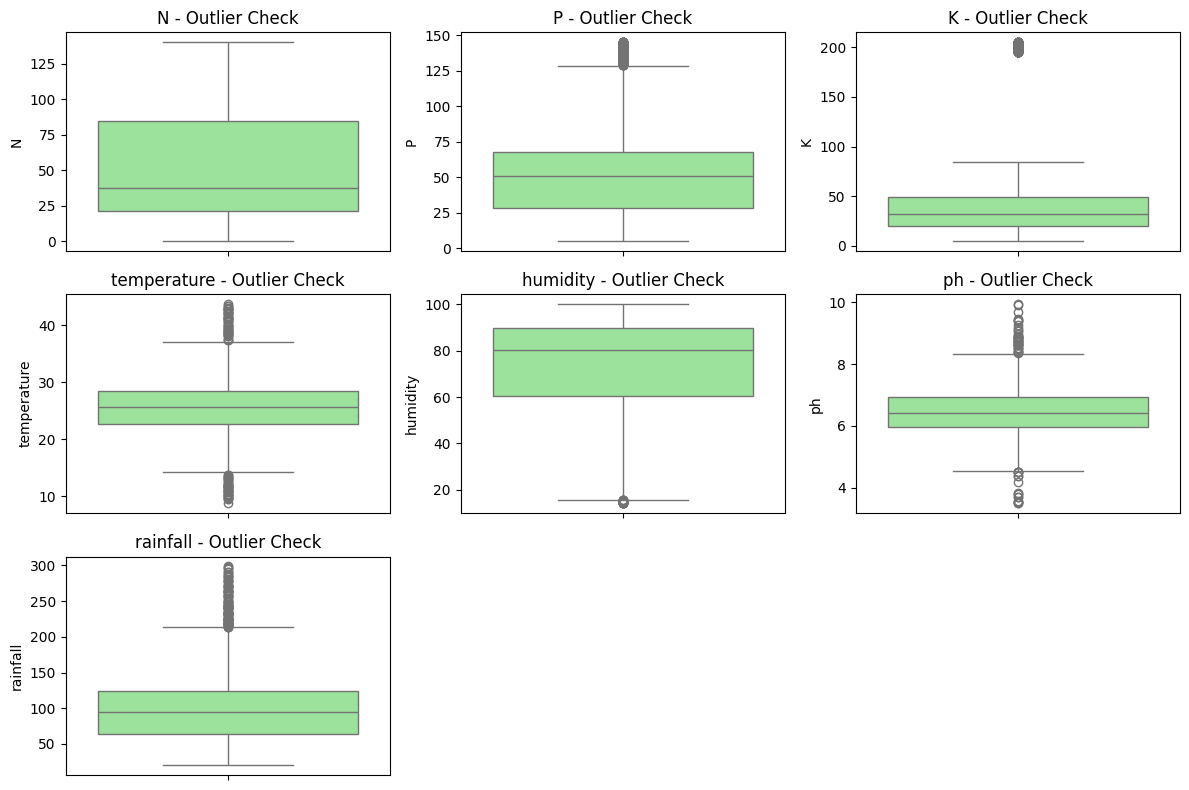

In [7]:
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=data[col], color='lightgreen')
    plt.title(f"{col} - Outlier Check")
plt.tight_layout()
plt.show()


**For removing outliers :**

In [8]:
# Remove outliers using IQR method
for col in numeric_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

print("✅ Outliers removed using IQR method (if any).")


✅ Outliers removed using IQR method (if any).


# **Step 4  : Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** in ML is the first and most important step before building any machine learning model.

It means **understanding, cleaning, and visualizing** your dataset
to decide what kind of model, features, and preprocessing steps are needed.

**Summary Statistics**

In [9]:
print("\n🔹 Summary Statistics:")
display(data.describe())



🔹 Summary Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000
mean,54.210184,45.161430,32.745937,25.711188,69.770583,6.493357,101.474427
std,37.928591,22.506246,16.614550,4.155121,22.649324,0.680293,52.432682
min,0.000000,5.000000,5.000000,15.330426,14.258040,4.603563,20.211267
25%,22.000000,25.000000,20.000000,23.267408,57.749008,6.033501,61.144916
50%,40.000000,46.000000,28.000000,25.839646,77.331406,6.470301,94.279811
75%,89.000000,63.000000,45.000000,28.518889,88.288685,6.944110,130.387488
max,140.000000,95.000000,85.000000,36.750875,99.981876,8.399136,248.859299


**Crop Count Plot**

A count plot shows how many times each category (crop type) appears in your dataset.

In this crop dataset, each row likely represents a record for a particular crop type —
so countplot helps you see which crops appear most or least in your data.

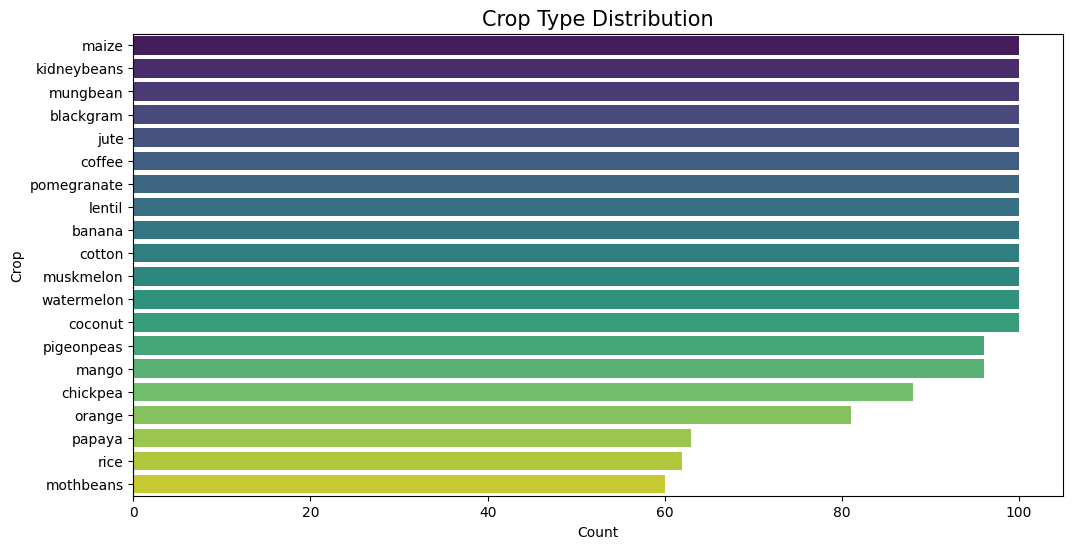

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(y=data['label'], order=data['label'].value_counts().index, palette='viridis')
plt.title("Crop Type Distribution", fontsize=15)
plt.xlabel("Count")
plt.ylabel("Crop")
plt.show()


**Correlation Heatmap**

A correlation heatmap shows the strength and direction of relationships between numeric variables in your dataset.

It helps you understand **how features are related** to each other

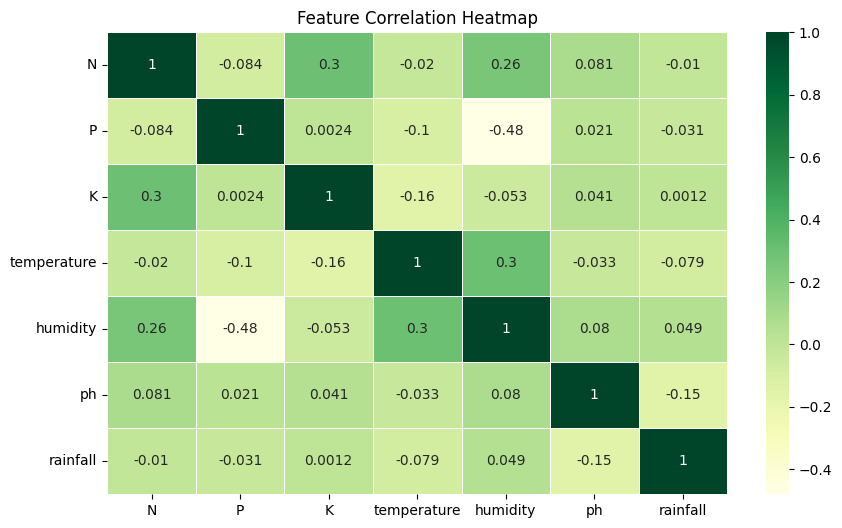

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='YlGn', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# **Step 5  : Feature Scaling (Normalization)**

Feature Scaling means adjusting the range of numeric data so that all features have a **similar scale (range of values).**

In [20]:
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled successfully.")


✅ Features scaled successfully.


# **Step 6  : Train-Test Split**

When you build a Machine Learning model, you want to test how well it performs on unseen data —
not just the data it was trained on.

So, we split the dataset into:

**Training set** → used to train (teach) the model.

**Testing set** → used to evaluate how well the model learned.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split completed!")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

✅ Data split completed!
Training samples: 1476
Testing samples: 370


**Training the Model**

In [24]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)
print("🌿 Model training completed successfully!")

🌿 Model training completed successfully!


# **Step 7  : Evaluate Model**


🔹 Model Accuracy: 99.46 %

🔹 Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        10
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas       1.00    

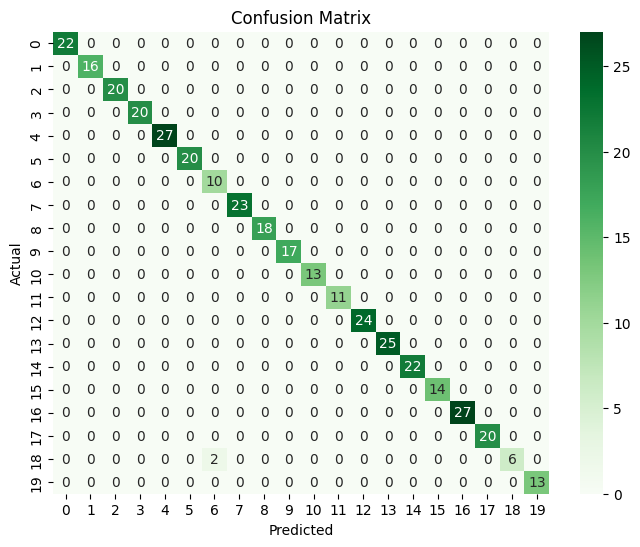

In [25]:
y_pred = model.predict(X_test)

print("\n🔹 Model Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Step 8  : Feature Importance Graph**

After training your machine learning model, you can find out which features (columns) had the biggest impact on your model’s predictions.

**In short:**

Feature importance tells you which factors matter most in predicting your target variable.

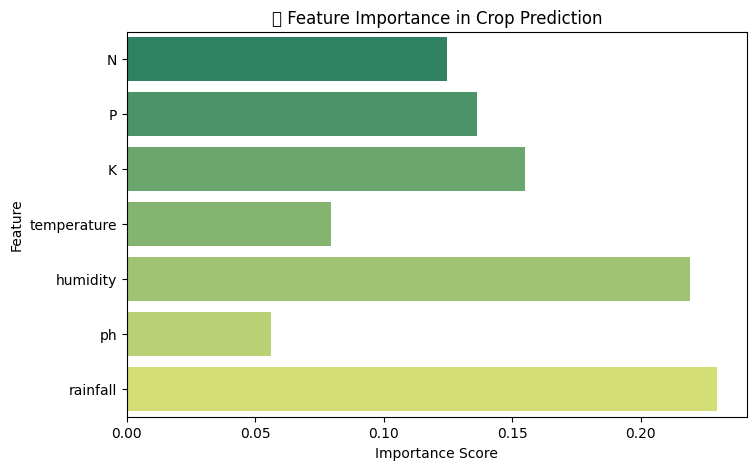

In [26]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette='summer')
plt.title("🌾 Feature Importance in Crop Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# **Step 9  : Predict for a New Input**

In [28]:
# Example: N=90, P=42, K=43, Temp=20°C, Humidity=80%, pH=6.5, Rainfall=50mm
sample = np.array([[90, 42, 43, 20, 80, 6.5, 50]])
prediction = model.predict(sample)
print(f"✅ Recommended Crop: {prediction[0]}")


✅ Recommended Crop: watermelon


# **Step 10  : Save Model for Later Use**

In [29]:
import pickle
pickle.dump(model, open("crop_model.pkl", "wb"))
print("✅ Model saved as crop_model.pkl")


✅ Model saved as crop_model.pkl
